In [109]:
import bashlex # parsing library #1
import bashlint # parsing library #2
from collections import Counter, OrderedDict
from pprint import pprint
import re
import numpy as np

In [110]:
with open(r'all.cm', encoding='utf-8') as f:
    data = f.readlines()

## Playing with `bashlex` functions

In [111]:
dir(bashlex)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'ast',
 'errors',
 'flags',
 'heredoc',
 'parse',
 'parser',
 'parsesingle',
 'parsetab',
 'shutils',
 'split',
 'state',
 'subst',
 'tokenizer',
 'utils',
 'yacc']

In [112]:
print(data[0])
print(list(bashlex.split(data[0]))) # splitting first command to elements

top -b -d2 -s1 | sed -e '1,/USERNAME/d' | sed -e '1,/^$/d'

['top', '-b', '-d2', '-s1', '|', 'sed', '-e', '1,/USERNAME/d', '|', 'sed', '-e', '1,/^$/d', '\n']


In [113]:
tp = bashlex.parse(data[0]) # parsing first command 
print(type(tp))
len(tp)

<class 'list'>


1

In [114]:
print(type(tp[0]))
tp[0]

<class 'bashlex.ast.node'>


PipelineNode(parts=[CommandNode(parts=[WordNode(parts=[] pos=(0, 3) word='top'), WordNode(parts=[] pos=(4, 6) word='-b'), WordNode(parts=[] pos=(7, 10) word='-d2'), WordNode(parts=[] pos=(11, 14) word='-s1')] pos=(0, 14)), PipeNode(pipe='|' pos=(15, 16)), CommandNode(parts=[WordNode(parts=[] pos=(17, 20) word='sed'), WordNode(parts=[] pos=(21, 23) word='-e'), WordNode(parts=[] pos=(24, 39) word='1,/USERNAME/d')] pos=(17, 39)), PipeNode(pipe='|' pos=(40, 41)), CommandNode(parts=[WordNode(parts=[] pos=(42, 45) word='sed'), WordNode(parts=[] pos=(46, 48) word='-e'), WordNode(parts=[] pos=(49, 58) word='1,/^$/d')] pos=(42, 58))] pos=(0, 58))

In [115]:
dir(tp[0])[-5:] # only few methods

['__weakref__', 'dump', 'kind', 'parts', 'pos']

In [116]:
print(tp[0].dump()) # dump allows to observe parts in pretty way

PipelineNode(pos=(0, 58), parts=[
  CommandNode(pos=(0, 14), parts=[
    WordNode(pos=(0, 3), word='top'),
    WordNode(pos=(4, 6), word='-b'),
    WordNode(pos=(7, 10), word='-d2'),
    WordNode(pos=(11, 14), word='-s1'),
  ]),
  PipeNode(pipe='|', pos=(15, 16)),
  CommandNode(pos=(17, 39), parts=[
    WordNode(pos=(17, 20), word='sed'),
    WordNode(pos=(21, 23), word='-e'),
    WordNode(pos=(24, 39), word='1,/USERNAME/d'),
  ]),
  PipeNode(pipe='|', pos=(40, 41)),
  CommandNode(pos=(42, 58), parts=[
    WordNode(pos=(42, 45), word='sed'),
    WordNode(pos=(46, 48), word='-e'),
    WordNode(pos=(49, 58), word='1,/^$/d'),
  ]),
])


`CommandNode` - have set of specific command elements  
`PipeNode` - separators  
`WordNode` - element of CommandNode

In [117]:
print(tp[0].parts) # returns all the pipeline parts in list
tp[0].pos # displays position of this specific element in original string

[CommandNode(parts=[WordNode(parts=[] pos=(0, 3) word='top'), WordNode(parts=[] pos=(4, 6) word='-b'), WordNode(parts=[] pos=(7, 10) word='-d2'), WordNode(parts=[] pos=(11, 14) word='-s1')] pos=(0, 14)), PipeNode(pipe='|' pos=(15, 16)), CommandNode(parts=[WordNode(parts=[] pos=(17, 20) word='sed'), WordNode(parts=[] pos=(21, 23) word='-e'), WordNode(parts=[] pos=(24, 39) word='1,/USERNAME/d')] pos=(17, 39)), PipeNode(pipe='|' pos=(40, 41)), CommandNode(parts=[WordNode(parts=[] pos=(42, 45) word='sed'), WordNode(parts=[] pos=(46, 48) word='-e'), WordNode(parts=[] pos=(49, 58) word='1,/^$/d')] pos=(42, 58))]


(0, 58)

In [118]:
print(data[48]) # test on more complex command

list(bashlex.split(data[48]))

for a in `find . -name '*.py'` ; do cp "$a" "$a.cp" ; echo "Added line" > "$a" ; cat "$a.cp" >> "$a" ; rm "$a.cp" ; done



['for',
 'a',
 'in',
 "`find . -name '*.py'`",
 ';',
 'do',
 'cp',
 '$a',
 '$a.cp',
 ';',
 'echo',
 'Added line',
 '>',
 '$a',
 ';',
 'cat',
 '$a.cp',
 '>>',
 '$a',
 ';',
 'rm',
 '$a.cp',
 ';',
 'done',
 '\n']

In [119]:
tp2 = bashlex.parse(data[48])
print(len(tp2))

1


In [120]:
print(tp2[0].list[0].dump())

ForNode(pos=(0, 120), parts=[
  ReservedwordNode(pos=(0, 3), word='for'),
  WordNode(pos=(4, 5), word='a'),
  ReservedwordNode(pos=(6, 8), word='in'),
  WordNode(pos=(9, 30), word="`find . -name '*.py'`", parts=[
    CommandsubstitutionNode(command=
      CommandNode(pos=(10, 29), parts=[
        WordNode(pos=(10, 14), word='find'),
        WordNode(pos=(15, 16), word='.'),
        WordNode(pos=(17, 22), word='-name'),
        WordNode(pos=(23, 29), word='*.py'),
      ]), pos=(9, 30)),
  ]),
  ReservedwordNode(pos=(31, 32), word=';'),
  ReservedwordNode(pos=(33, 35), word='do'),
  ListNode(pos=(36, 115), parts=[
      CommandNode(pos=(36, 51), parts=[
        WordNode(pos=(36, 38), word='cp'),
        WordNode(pos=(39, 43), word='$a', parts=[
          ParameterNode(pos=(40, 42), value='a'),
        ]),
        WordNode(pos=(44, 51), word='$a.cp', parts=[
          ParameterNode(pos=(45, 47), value='a'),
        ]),
      ]),
      OperatorNode(op=';', pos=(52, 53)),
      CommandNode

In [121]:
print(isinstance(tp2,(list,dict))) # check of isinstance
print(isinstance(tp2[0],(bashlex.ast.node)))

True
True


In [122]:
tp2[0].list

[ForNode(parts=[ReservedwordNode(pos=(0, 3) word='for'), WordNode(parts=[] pos=(4, 5) word='a'), ReservedwordNode(pos=(6, 8) word='in'), WordNode(parts=[CommandsubstitutionNode(command=CommandNode(parts=[WordNode(parts=[] pos=(10, 14) word='find'), WordNode(parts=[] pos=(15, 16) word='.'), WordNode(parts=[] pos=(17, 22) word='-name'), WordNode(parts=[] pos=(23, 29) word='*.py')] pos=(10, 29)) pos=(9, 30))] pos=(9, 30) word="`find . -name '*.py'`"), ReservedwordNode(pos=(31, 32) word=';'), ReservedwordNode(pos=(33, 35) word='do'), ListNode(parts=[CommandNode(parts=[WordNode(parts=[] pos=(36, 38) word='cp'), WordNode(parts=[ParameterNode(pos=(40, 42) value='a')] pos=(39, 43) word='$a'), WordNode(parts=[ParameterNode(pos=(45, 47) value='a')] pos=(44, 51) word='$a.cp')] pos=(36, 51)), OperatorNode(op=';' pos=(52, 53)), CommandNode(parts=[WordNode(parts=[] pos=(54, 58) word='echo'), WordNode(parts=[] pos=(59, 71) word='Added line'), RedirectNode(heredoc=None input=None output=WordNode(parts

### Iterate until get all basic elements

Output of `bashlex.parse()` is list.  
List has elements of `bashlex.ast.node` which may have either `list`, `parts` or `command` properties (at least figured those two by now) that contain next elements.

In [123]:
def iterate_bashlex(input_object):
    output = Counter()
    if isinstance(input_object, list):
        for element in input_object:
            output += iterate_bashlex(element)
    elif isinstance(input_object, bashlex.ast.node):
        object_methods = [x for x in dir(input_object) if '__' not in x]
        if 'command' in object_methods:
            output += iterate_bashlex(input_object.command)
        elif 'list' in object_methods:
            for element in input_object.list:
                output += iterate_bashlex(element)
        elif 'parts' in object_methods:        
            if input_object.parts:
                for part in input_object.parts:
                    output += iterate_bashlex(part)
            else:
                output[input_object.word] += 1
        elif 'word' in object_methods:
            output[input_object.word] += 1
    return output

In [124]:
for nodes in tp2:
    token_dict = iterate_bashlex(nodes)
print(token_dict)

Counter({'for': 1, 'a': 1, 'in': 1, 'find': 1, '.': 1, '-name': 1, '*.py': 1, ';': 1, 'do': 1, 'cp': 1, 'echo': 1, 'Added line': 1, 'cat': 1, 'rm': 1, 'done': 1})


### Testing on full corpus

In [125]:
# testing bashlex functions with lists
alldict = Counter()
for command in data[0:10]:
    for node in bashlex.parse(command):
        alldict += iterate_bashlex(node)
print(dict(alldict))

{'top': 10, '-b': 5, '-d2': 1, '-s1': 1, 'sed': 4, '-e': 2, '1,/USERNAME/d': 1, '1,/^$/d': 1, '-n': 4, '1': 2, '-u': 1, 'abc': 1, 'awk': 3, 'NR>7 { sum += $9; } END { print sum; }': 1, '-d': 1, '5': 1, '2': 1, '$1 == "PID" {block_num++; next} block_num == 2 {sum += $9;} END {print sum}': 1, '-bn1': 3, 'grep': 3, 'zombie': 2, '/Cpu/p': 1, '{print $4" "$6" "$8" "$10}': 1, '-n1': 3, '-c': 1, 'processname': 1, 's/\\(.*\\)$/\\1__CUSTOM_LINE_MARKER/g': 1}


In [126]:
# trying on all data
alldict = Counter()
errors = 0
for i,command in enumerate(data):
    print(f'{i}/{len(data)}',end='\r')
    try:
        for node in bashlex.parse(command):
            alldict += iterate_bashlex(node)
    except bashlex.errors.ParsingError as ex:
        #print(command, ex)
        errors += 1
    except NotImplementedError as ex:
        #print(command, ex)
        errors += 1
    except TypeError as ex:
        #print(command, ex)
        errors += 1

print(f'Parsing errors encountered on {errors*100/len(data):.2f} % of data.')

Parsing errors encountered on 1.01 % of data.


In [127]:
# unique elements
len(alldict)

8724

In [128]:
# only ~2k unique elements appear more than 3 times
print(len({k:v for k,v in alldict.items() if v >= 3})) 
# only ~1k unique elements appear more than 5 times
print(len({k:v for k,v in alldict.items() if v >= 5})) 

1950
1074


In [129]:
# 20 elements with highest counts
alldict.most_common(20)

[('find', 7747),
 ('.', 3728),
 ('-name', 3563),
 ('-type', 3354),
 ('f', 2438),
 ('{}', 2274),
 ('-exec', 2086),
 (';', 1823),
 ('xargs', 1523),
 ('grep', 1333),
 ('-print', 927),
 ('d', 848),
 ('/', 778),
 ('1', 740),
 ('-print0', 725),
 ('sort', 704),
 ('-o', 667),
 ('-l', 655),
 ('sed', 611),
 ('rm', 611)]

## Investigating parsin errors

Around ~5k of Counter() elements appears only once - this means that they're large parts of original dataset w/ poor parsing...

In [130]:
print(len({k:v for k,v in alldict.items() if v == 1})) 

5204


Investigating specific examples of poorly parsed commands..

In [131]:
# 20 least common
alldict.most_common()[:-20:-1]

[('"{" "\\C-v{}\\ei"', 1),
 ('vi-insert', 1),
 ('attrib', 1),
 ('inotifywait', 1),
 ('\\./[a-f0-9\\-]{36}\\.jpg', 1),
 ("unzip -c %p | grep -q '<stringWithOrWithoutSpacesToFind>' && echo %pn", 1),
 ('#*', 1),
 ('/ /_/', 1),
 ('-Rd', 1),
 ('4444', 1),
 ('10022', 1),
 ('/^[[:space:]]*$/d', 1),
 ('HOST', 1),
 ('ForwardAgent=yes', 1),
 ('IdentitiesOnly=yes', 1),
 ('LogLevel=FATAL', 1),
 ('DSAAuthentication=yes', 1),
 ('Compression=yes', 1),
 ('vagrant@127.0.0.1', 1)]

Right away it's sen that algorithm does poorly on identifying flags and their parameters separated by `=` sign.

In [132]:
bad_example = [x for x in data if 'LogLevel=FATAL' in x][0]
be = bashlex.parse(bad_example)
bad_example

'ssh vagrant@127.0.0.1 -p 2222 -o Compression=yes -o DSAAuthentication=yes -o LogLevel=FATAL -o StrictHostKeyChecking=no -o UserKnownHostsFile=/dev/null -o IdentitiesOnly=yes -i ~/.vagrant.d/less_insecure_private_key -o ForwardAgent=yes\n'

In [133]:
print(len(be))
print(be[0].dump())

1
CommandNode(pos=(0, 235), parts=[
  WordNode(pos=(0, 3), word='ssh'),
  WordNode(pos=(4, 21), word='vagrant@127.0.0.1'),
  WordNode(pos=(22, 24), word='-p'),
  WordNode(pos=(25, 29), word='2222'),
  WordNode(pos=(30, 32), word='-o'),
  WordNode(pos=(33, 48), word='Compression=yes'),
  WordNode(pos=(49, 51), word='-o'),
  WordNode(pos=(52, 73), word='DSAAuthentication=yes'),
  WordNode(pos=(74, 76), word='-o'),
  WordNode(pos=(77, 91), word='LogLevel=FATAL'),
  WordNode(pos=(92, 94), word='-o'),
  WordNode(pos=(95, 119), word='StrictHostKeyChecking=no'),
  WordNode(pos=(120, 122), word='-o'),
  WordNode(pos=(123, 151), word='UserKnownHostsFile=/dev/null'),
  WordNode(pos=(152, 154), word='-o'),
  WordNode(pos=(155, 173), word='IdentitiesOnly=yes'),
  WordNode(pos=(174, 176), word='-i'),
  WordNode(pos=(177, 215), word='~/.vagrant.d/less_insecure_private_key', parts=[
    TildeNode(pos=(177, 178), value='~'),
  ]),
  WordNode(pos=(216, 218), word='-o'),
  WordNode(pos=(219, 235), word=

Indeed flags are not parsed by `bashlex` itself and are not weakness of `iterate_bashlex` function.  
  
Another case is full `unzip` comand. Presumably it is embedded into another one - let's take a look:

In [134]:
bad_example2 = [x for x in data if 'stringWithOrWithoutSpacesToFind' in x][0]
be2 = bashlex.parse(bad_example2)
bad_example2

'find . -iname \'*.jar\' -printf "unzip -c %p | grep -q \'<stringWithOrWithoutSpacesToFind>\' && echo %p\\n" | sh\n'

In [135]:
print(len(be2))
print(be2[0].dump())

1
PipelineNode(pos=(0, 107), parts=[
  CommandNode(pos=(0, 102), parts=[
    WordNode(pos=(0, 4), word='find'),
    WordNode(pos=(5, 6), word='.'),
    WordNode(pos=(7, 13), word='-iname'),
    WordNode(pos=(14, 21), word='*.jar'),
    WordNode(pos=(22, 29), word='-printf'),
    WordNode(pos=(30, 102), word="unzip -c %p | grep -q '<stringWithOrWithoutSpacesToFind>' && echo %pn"),
  ]),
  PipeNode(pipe='|', pos=(103, 104)),
  CommandNode(pos=(105, 107), parts=[
    WordNode(pos=(105, 107), word='sh'),
  ]),
])


Again we see that it indeed is `bashlex` weakness. Will try to give every single element to additional parsing cycle.

In [136]:
def bashlex_wrapper(command, cntr):
    global ERR
    try:
        nodes = bashlex.parse(command)
        return nodes
    except (bashlex.errors.ParsingError, NotImplementedError, TypeError):
        for element in re.split(r" |,|{|}",command):
            cntr[element.strip()] += 1
        ERR += 1
        return None

In [137]:

def parse_word(input_object, output, skipparse=False):
    # TRY TO PARSE COMMAND AGAIN    
    neword = ''
    size = 1
    word = re.sub(r"[<>#{}]", "", input_object.word).strip()
    #word = input_object.word.strip("<>")
    if len(input_object.word) > 20:
        p = bashlex_wrapper(word, output)
        if p:
            try:
                size = len(p[0].parts)
            except AttributeError:
                size = len(p[0].list)
    if size > 1: # if size > 1 then parsing found something new
        for node in p:
            output += iterate_bashlex2(node)
        return output
    # ADDED TO PARSE FLAGS WITH '=' BETTER
    if '=' in input_object.word and '==' not in input_object.word:
        l = input_object.word.split('=')
        if 'chmod' in input_object.word.lower():
            output[l[0]] += 1
            output['='.join(l[1:])] += 1
        elif len(l) == 2:
            output[l[0]] += 1
            output[l[1]] += 1
        else:
            output[input_object.word] += 1            
    # STANDARD CASE
    else:
        output[input_object.word] += 1
    return output


def iterate_bashlex2(input_object):
    output = Counter()
    if isinstance(input_object, list):
        for element in input_object:
            output += iterate_bashlex2(element)
    elif isinstance(input_object, bashlex.ast.node):
        object_methods = [x for x in dir(input_object) if '__' not in x]
        if 'command' in object_methods:
            output += iterate_bashlex2(input_object.command)
        elif 'list' in object_methods:
            for element in input_object.list:
                output += iterate_bashlex2(element)
        elif 'parts' in object_methods:        
            if input_object.parts:
                for part in input_object.parts:
                    output += iterate_bashlex2(part)
            else:
                output = parse_word(input_object, output)
        elif 'word' in object_methods:
            output = parse_word(input_object, output)
        # Working on default specific types
        elif 'value' in object_methods:
            output[input_object.value] += 1
        elif "pipe" in object_methods:
            output[input_object.pipe] += 1
        elif "op" in object_methods:
            output[input_object.op] += 1
        elif "type" in object_methods:
            output[input_object.type] += 1
        else:
            print("Weird case:", input_object)
            import pdb; pdb.set_trace()
    return output

In [138]:
iterate_bashlex2(be)

Counter({'ssh': 1,
         'vagrant@127.0.0.1': 1,
         '-p': 1,
         '2222': 1,
         '-o': 7,
         'Compression': 1,
         'yes': 4,
         'DSAAuthentication': 1,
         'LogLevel': 1,
         'FATAL': 1,
         'StrictHostKeyChecking': 1,
         'no': 1,
         'UserKnownHostsFile': 1,
         '/dev/null': 1,
         'IdentitiesOnly': 1,
         '-i': 1,
         '~': 1,
         'ForwardAgent': 1})

Now it's seen that flag/value pairs with `=` sign are splitted correctly for problematic example.  
Let's check that on command within command:

In [139]:
iterate_bashlex2(be2)

Counter({'find': 1,
         '.': 1,
         '-iname': 1,
         '*.jar': 1,
         '-printf': 1,
         'unzip': 1,
         '-c': 1,
         '%p': 1,
         '|': 2,
         'grep': 1,
         '-q': 1,
         'stringWithOrWithoutSpacesToFind': 1,
         '&&': 1,
         'echo': 1,
         '%pn': 1,
         'sh': 1})

In [140]:
# trying on all data
alldict2 = Counter()
ERR = 0
for i,command in enumerate(data):
    nodes = None
    print(f'{i}/{len(data)}',end='\r')
    nodes = bashlex_wrapper(command, alldict2)
    if nodes:
        for node in nodes:
            alldict2 += iterate_bashlex2(node)

print(f'Parsing errors encountered on {ERR*100/len(data):.2f} % of data.')

Parsing errors encountered on 3.15 % of data.


In [141]:
print(len({k:v for k,v in alldict2.items() if v == 1})) 

6188


Nevertheless number of unique elements is approximately the same, parsing now is better. Increase is due to fact that amount of command elements increased as well.  

In [142]:
print(sum(alldict.values()))
print(sum(alldict2.values()))

85100
101232


As example, see flags `LogLevel` or `--chmod` that appar in dataset. Previously they wasn't parsed at all...  
`/dev/null` counter in this case increased as well. 

In [143]:
print({k:v for k,v in alldict2.items() if k == "LogLevel"}) 
print({k:v for k,v in alldict2.items() if k == "--chmod"})
print({k:v for k,v in alldict2.items() if k == "/dev/null"}) 

{'LogLevel': 2}
{'--chmod': 4}
{'/dev/null': 44}


In [144]:
# Baseline value - should increase after correct parsing
print({k:v for k,v in alldict.items() if k == "/dev/null"}) 

{'/dev/null': 28}


### Status quo

Still relatively large amount of single time appearing tags.  
Looking on them it is seen that they're sort of unique elements and not parsing errors anymore...

In [145]:
alldict2.most_common()[:-30:-1]

[('"{" "\\C-v{}\\ei"', 1),
 ('vi-insert', 1),
 ('attrib', 1),
 ('inotifywait', 1),
 ('\\./[a-f0-9\\-]{36}\\.jpg', 1),
 ('stringWithOrWithoutSpacesToFind', 1),
 ('#*', 1),
 ('/ /_/', 1),
 ('"$(', 1),
 ('DIR="$(', 1),
 ('pwd)/$(basename', 1),
 ('"$(dirname', 1),
 ('ABSOLUTE_PATH="$(cd', 1),
 ('-Rd', 1),
 ('4444', 1),
 ('10022', 1),
 ('/^[[:space:]]*$/d', 1),
 ('ForwardAgent', 1),
 ('IdentitiesOnly', 1),
 ('FATAL', 1),
 ('DSAAuthentication', 1),
 ('Compression', 1),
 ('vagrant@127.0.0.1', 1),
 ('--host', 1),
 ('vagrant@localhost', 1),
 ('s/n/', 1),
 ('s/@/', 1),
 ('s/s/', 1),
 ('s/^s+/-o@/', 1)]

In [146]:
alldict2.most_common(30)

[('find', 7846),
 ('|', 6487),
 ('.', 3775),
 ('-name', 3616),
 ('-type', 3403),
 ('f', 2539),
 (';', 2389),
 ('{}', 2275),
 ('-exec', 2108),
 ('xargs', 1546),
 ('grep', 1385),
 ('1', 1037),
 ('-print', 942),
 ('d', 889),
 ('/', 806),
 ('-print0', 729),
 ('sort', 709),
 ('', 702),
 ('-o', 692),
 ('-l', 683),
 ('echo', 644),
 ('rm', 636),
 ('sed', 629),
 ('-0', 594),
 ('ls', 557),
 ('-mtime', 553),
 ('awk', 546),
 ('-n', 535),
 ('-c', 511),
 ('-iname', 502)]

### Visualise

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

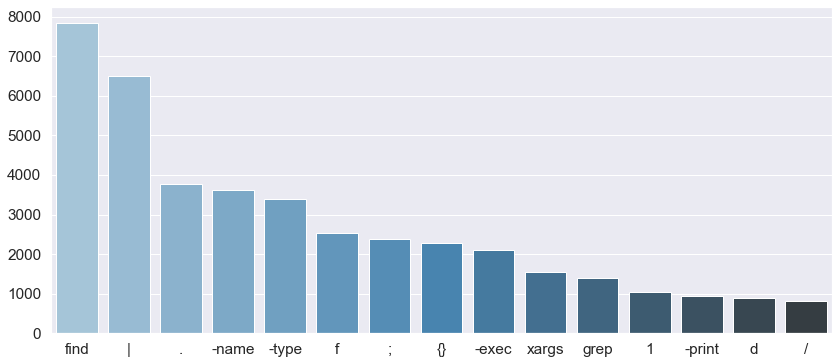

In [175]:
X,Y = zip(*alldict2.most_common(15))

sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)
plt.figure(figsize=(14,6))
bars = sns.barplot(x=list(X), y=list(Y), palette="Blues_d")
bars.get_figure().savefig("img/absolute_element_counts.png")

## Trying visualisations excluding symbols

In [170]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [174]:
bash_stopwords = [key for key in alldict2.keys() if all(key.isdigit() or j in string.punctuation for j in key)]
clean_dict = {key:alldict2[key] for key in alldict2.keys() if not all(key.isdigit() or j in string.punctuation for j in key)}

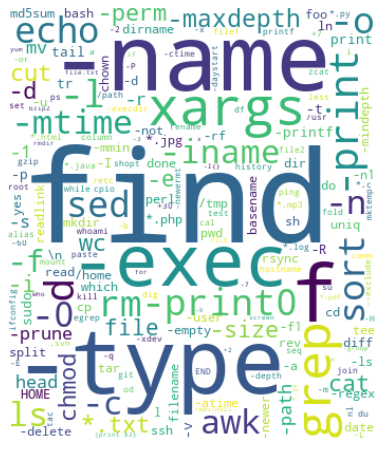

In [178]:
# TRY WORD CLOUD
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from os import path

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

tuxmask = np.array(Image.open(path.join(d, "img/Tux.png")))#.convert("1")).astype(int)
img_color = ImageColorGenerator(tuxmask)

wc = WordCloud(background_color="white", \
                stopwords=bash_stopwords, \
                max_words=200, \
                contour_width=3, \
                contour_color='steelblue',\
                mask=tuxmask) # Cannot make to work it w/ mask ....

# generate word cloud
wc.generate_from_frequencies(dict(clean_dict))
plt.figure(figsize=(16,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('img/wordcloud.png', bbox_inches='tight')
#plt.close()


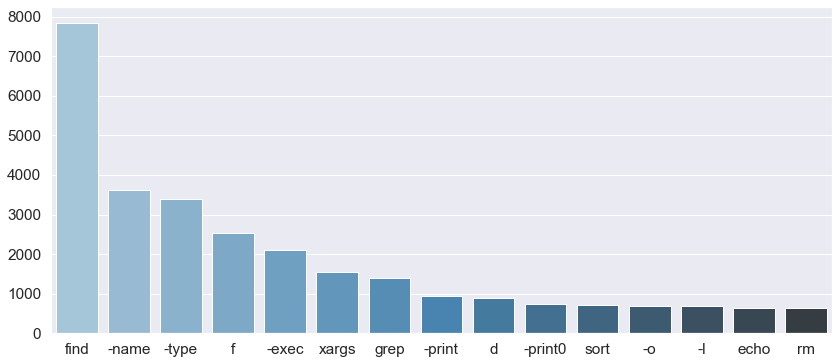

In [179]:
X,Y = zip(*Counter(clean_dict).most_common(15))

sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)
plt.figure(figsize=(14,6))
bars = sns.barplot(x=list(X), y=list(Y), palette="Blues_d")
bars.get_figure().savefig("img/absolute_element_counts.png")